# (Exploratory Data Anaysis- Forb bike trip data from 2019)
## by (Jawwad Hussain)

## Preliminary Wrangling

> The dataset provided for this project is from Fordbike set which is from February 2019.
> It contains information for individual bikers regarding their date of birth, their subscription type, their start and end station names and Ids.
> The data also contains duration in seconds regarding the biker's trip and their corresponding Gender.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
#Loading and exploring bike data.
bike= df= pd.read_csv('C:/Users/hussaja/Documents/Udacity_DataAnalytics_NanoDegree/Course5- Data Visualization/Project/bike_data.csv')
print(bike.dtypes)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [4]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


### Structure of the dataset?

> The bike share data consists of 183,412 rows and 16 columns. The variables are in integer, float and string format.
> There are 8,265 NULL entries in member birth year and member gender columns.
> Out of 16 variables, 9 are are numerical, 2 are datetime and 4 are object type and 1 is Boolean(Y/N) form.

### Main ain feature(s) of interest in the dataset?

> Overall looking for how trip duration is dependent on other specifications from the dataset.
> Which stations take the most traffic and why.
> Which genders get more bike rentals.
> What is the proportion of gender and their subscription type(Customer or Subscriber).
> Any other factors that can influence the trip duration in general.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I assume that the trip duration will have dependencies on the start and end station types. Also will investigate if it has any correlation with the customer's subscription type (customer or subscriber) and their age and genders.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [5]:
# Changing duration in seconds to minute and hour.
bike['duration_min']= bike['duration_sec']/60
bike.head()
bike['duration_hr']= bike['duration_min']/60
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,duration_hr
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,14.495833
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.683333,11.811389
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000,17.181667
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667,10.136111
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667,0.440278


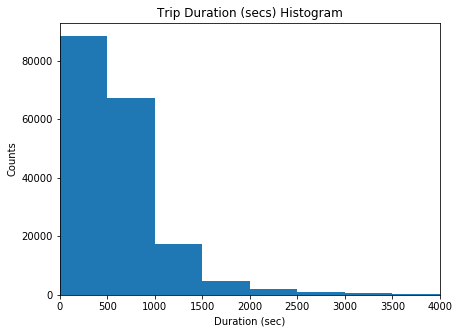

In [6]:
# Univariate plot for trip duration in seconds and hours.
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
binsize = 500
bins_sec = np.arange(0, bike['duration_sec'].max()+binsize, binsize)
plt.hist(data = bike, x = 'duration_sec', bins = bins_sec)
plt.title('Trip Duration (secs) Histogram')
plt.xlabel('Duration (sec)')
plt.ylabel('Counts');
plt.xlim(0,4000);


#### Trip duration is mostly concentrated between 500 to 1000 secs. Also, counts seem to take a peak from 80k to 90k and then ramp down from there onwards. The histogram is a unimodal in characteristics. 

In [7]:
bike.duration_hr.describe()

count    183412.000000
mean          0.201688
std           0.498442
min           0.016944
25%           0.090278
50%           0.142778
75%           0.221111
max          23.734444
Name: duration_hr, dtype: float64

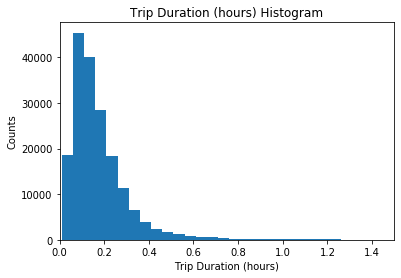

In [8]:
# Replotting the trip duration in hours histogram.
bins_hr= np.arange(0.01,24+1,0.05)
plt.hist(data=bike,x='duration_hr',bins=bins_hr);
plt.xlim(0,1.5);
plt.xlabel('Trip Duration (hours)');
plt.ylabel('Counts');
plt.title('Trip Duration (hours) Histogram');

#### Trip duration in hours shows the peaks concentrated around 0.05 hour till 0.2 hours roughly.

In [9]:
# Adding age column in the dataset to compute the member's age. Dataset belongs to 2019 so computing it with that year.
bike['age']= 2019 - bike['member_birth_year']

#### Above, I calculated rider's age in years through calculation since we want to know how young the riders are in general. Through `bike.age.describe()` code it looks like they fall in 18 till 141 years range.

In [10]:
bike.age.describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

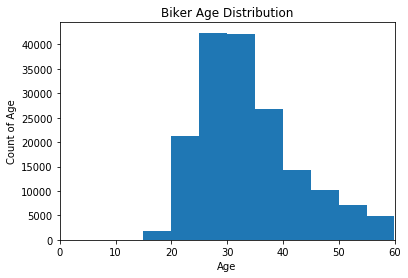

In [11]:
# Plotting the age in histogram format.
bins_age= np.arange(15,141+1,5)
plt.hist(data=bike,x='age',bins=bins_age);
plt.xlim(0,60);
plt.title('Biker Age Distribution');
plt.xlabel('Age');
plt.ylabel('Count of Age');

#### It looks like that the age distribution of the bikers range between 25 to 35 following the mode of the histogram. Bikers with most counts are in the younger age bracket. There are few outliers for sure where age >100 years.  In total 72 rows found where age>=100 years.

In [12]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 19 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
duration_min               183412 non-null float64
duration_hr                183412

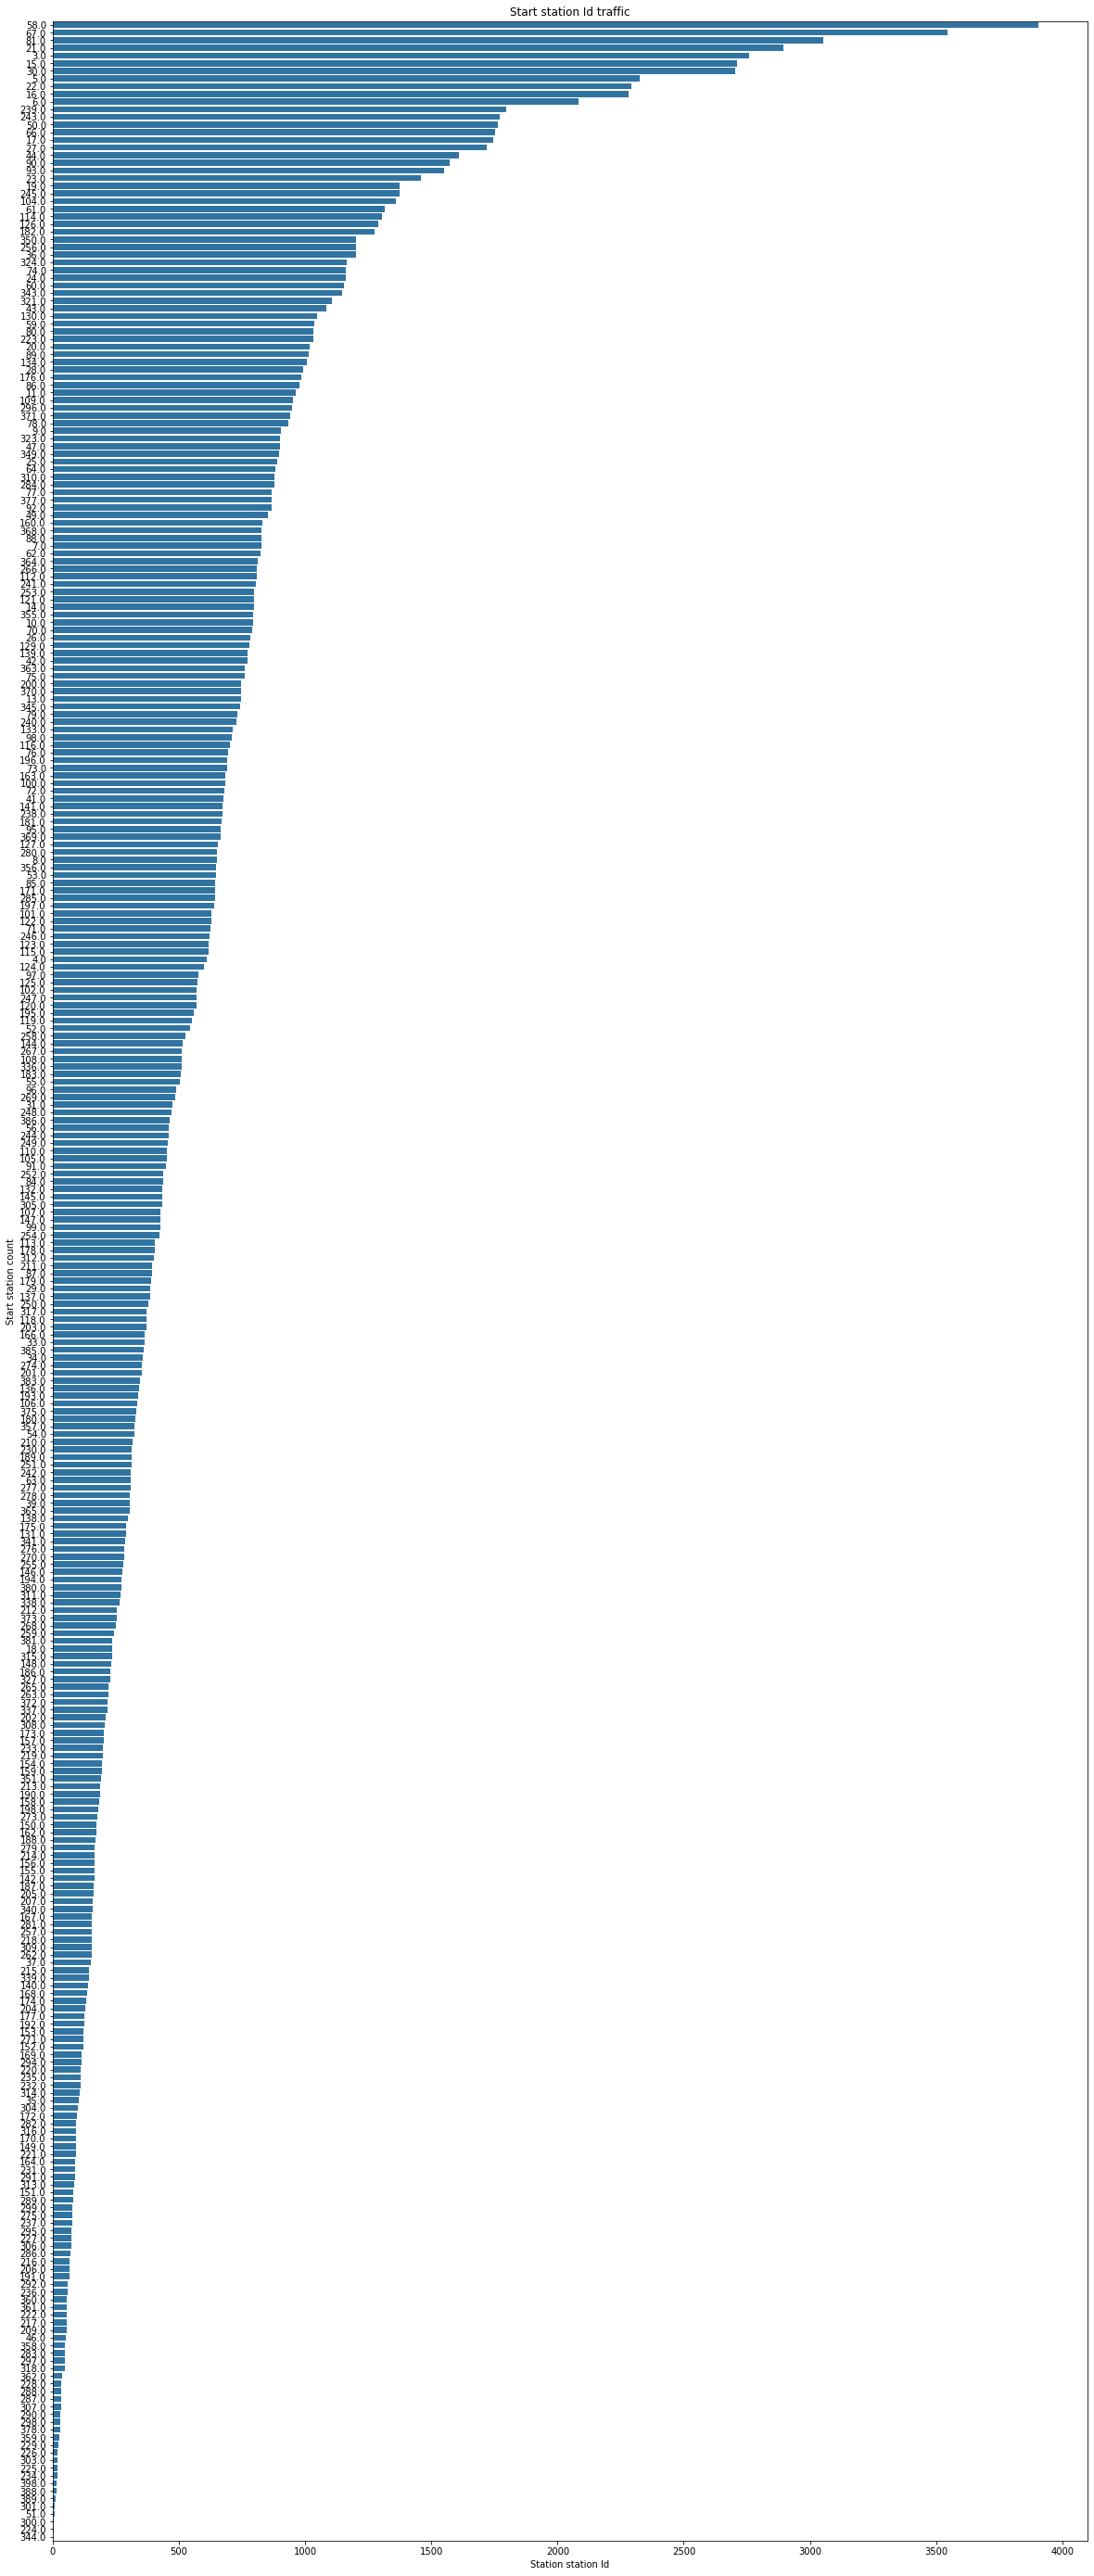

In [13]:
# Bar plot of which starting station takes the most traffic.
plt.figure(figsize=[20,50])
base_color= sb.color_palette()[0]
st_order= bike.start_station_id.value_counts().index
sb.countplot(data=bike, y='start_station_id',color=base_color,order=st_order);
plt.title('Start station Id traffic');
plt.xlabel('Station station Id');
plt.ylabel('Start station count');

#### Start station ids 16,22,5,30,15,3,21,81,67 and 58 take the most traffic in terms of counts.

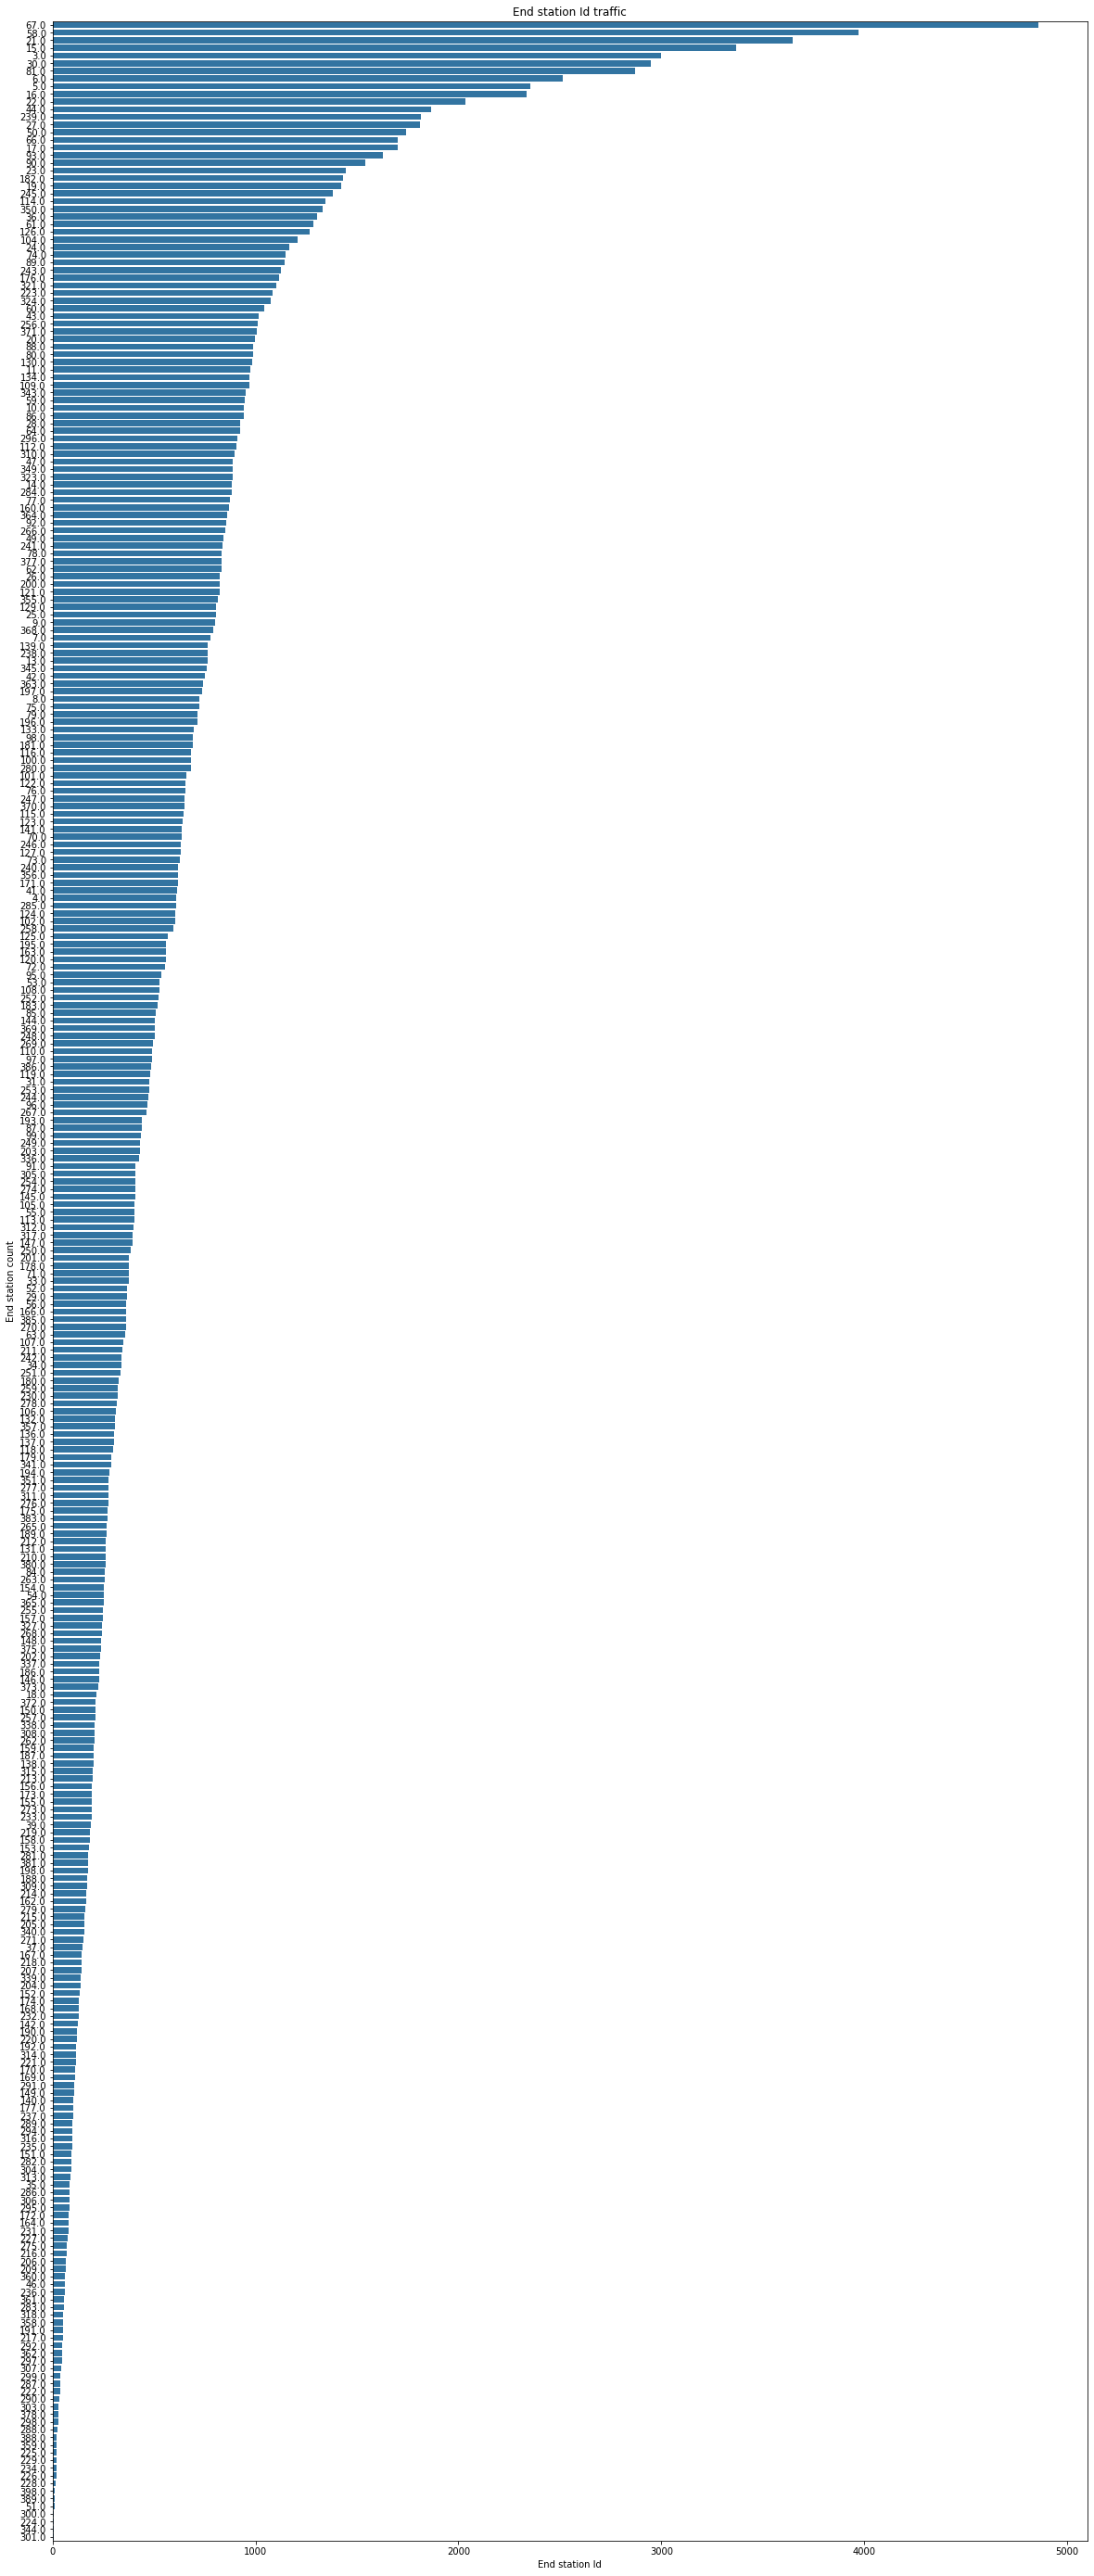

In [14]:
# Bar plot of which starting station takes the most traffic.
plt.figure(figsize=[20,50])
base_color= sb.color_palette()[0]
st_order= bike.end_station_id.value_counts().index
sb.countplot(data=bike, y='end_station_id',color=base_color,order=st_order);
plt.title('End station Id traffic');
plt.xlabel('End station Id');
plt.ylabel('End station count');

#### End station ids 16,5,6,81,30,3,15,21,58 and 67 take the most traffic in terms of counts.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Trip duration in hours is between 0.14 to 0.3 hours range or between 500-1000 seconds range.
> Biker's age distribution is with in 25-35 years range.
> Top 10 start and end stations for traffic count seems to be overlapping.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Birth year had to be converted to age by taking 2019 as baseline year since the data belongs to Feb 2019.
> Also instead of station names I plotted station ids for seeing a clearer chart.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

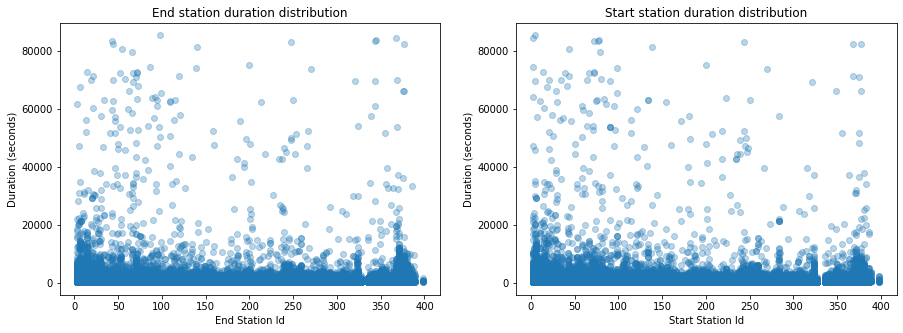

In [60]:
#Plotting if there is any relation between station ids and duration in seconds.
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.scatter(data=bike,y='duration_sec',x='end_station_id',alpha=0.3);
plt.title('End station duration distribution');
plt.xlabel('End Station Id');
plt.ylabel('Duration (seconds)');
plt.subplot(1,2,2)
plt.scatter(data=bike,y='duration_sec',x='start_station_id',alpha=0.3);
plt.xlabel('Start Station Id');
plt.ylabel('Duration (seconds)');
plt.title('Start station duration distribution');

#### It shows that some start and end stations bike duration (seconds) are higher. Transparency has been added to the plot to highlight overlapping points.

No handles with labels found to put in legend.


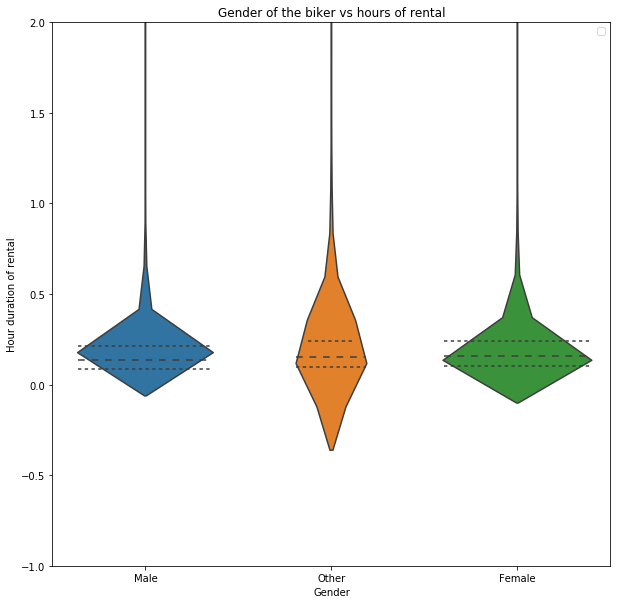

In [16]:
# Calculating which gender rents the for longer hours.
bike.head()
plt.figure(figsize=[10,10])
sb.violinplot(data=bike,x='member_gender',y='duration_hr',inner='quartile');
plt.ylim(-1,2);
plt.xlabel('Gender');
plt.ylabel('Hour duration of rental');
plt.title('Gender of the biker vs hours of rental');
plt.legend();

In [17]:
# Checking the median of the gender.
bike.query('member_gender=="Female"').duration_hr.median(),bike.query('member_gender=="Male"').duration_hr.median(),bike.query('member_gender=="Other"').duration_hr.median()


(0.15777777777777777, 0.13694444444444445, 0.15416666666666667)

> From the  violine plot, it looks like Females have more data samples bike rentals while the median of hours is slightly higher than the other two genders.

In [18]:
# Finding which gender based on it's subscription rents more bikes.
bike.groupby(['member_gender'])['user_type'].value_counts().sort_values

<bound method Series.sort_values of member_gender  user_type 
Female         Subscriber     36197
               Customer        4647
Male           Subscriber    119122
               Customer       11529
Other          Subscriber      3197
               Customer         455
Name: user_type, dtype: int64>

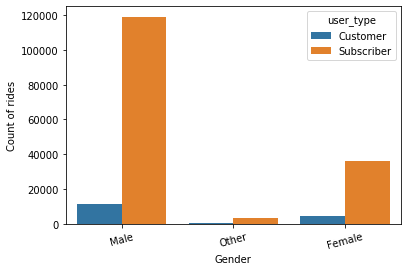

In [19]:
# Finding which subscriber rides more bikes vs genders.
sb.countplot(data= bike, x='member_gender',hue='user_type');
plt.xticks(rotation=15);
plt.xlabel('Gender');
plt.ylabel('Count of rides');

#### The plot above shows that Subscriber type customer rides more bikes vs Customer type since more people use their subscription vs the new customers.

In [20]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,duration_hr,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000,14.495833,35.0
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.683333,11.811389,NaN
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000,17.181667,47.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667,10.136111,30.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667,0.440278,45.0


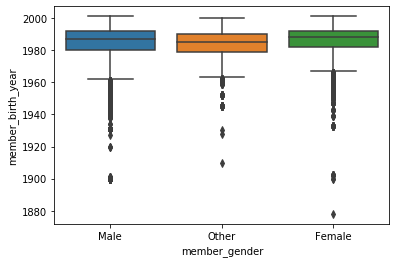

In [21]:
# Finding the relationship between the gender and their year of birth.
sb.boxplot(data=bike,x='member_gender',y='member_birth_year');

> The boxplot for bivariate relationship shows that on average Females in the dataset are 1 year younger than Men and 2 year younger than Other Genders.

In [22]:
bike.query('member_gender=="Female"').member_birth_year.mean(),bike.query('member_gender=="Male"').member_birth_year.mean(),bike.query('member_gender=="Other"').member_birth_year.mean()

(1985.7825384389384, 1984.5483999357066, 1983.1210295728367)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Noticed that 'Subscriber' type customers have more counts of bike rides vs the 'Customer' types.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Notice that the bike riders are generally younger population mainly in 25 to 40 years of age brackets.
> There are some outlier points where some bikers are older than 100 years though.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [47]:
# Calculating start time day from start time datetime column.
bike.start_time = pd.to_datetime(bike.start_time)
bike['start_time_day'] = bike['start_time'].dt.strftime('%a')

In [48]:
bike.start_time_day.value_counts()

Thu    35197
Tue    31813
Wed    29641
Fri    28981
Mon    26852
Sun    15523
Sat    15405
Name: start_time_day, dtype: int64

In [49]:
# Calculalting start hour from start time column.
bike['start_hr'] = bike['start_time'].dt.hour
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,duration_hr,age,start_time_day,start_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,870.0,14.495833,35.0,Thu,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,709.0,11.811389,NaN,Thu,18
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,1031.0,17.181667,47.0,Thu,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,608.0,10.136111,30.0,Thu,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,26.0,0.440278,45.0,Thu,23


In [50]:
#Rounding duration minute for easy undetstanding.
bike['duration_min']=bike['duration_min'].round()
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,duration_hr,age,start_time_day,start_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,870.0,14.495833,35.0,Thu,17
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,709.0,11.811389,NaN,Thu,18
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,1031.0,17.181667,47.0,Thu,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,608.0,10.136111,30.0,Thu,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,26.0,0.440278,45.0,Thu,23


In [51]:
# Arranging days in order.
start_day= ['Sat','Sun','Mon','Tue','Wed','Thu','Fri']
start_day_order= pd.api.types.CategoricalDtype(ordered=True,categories=start_day)
bike['start_time_day']= bike['start_time_day'].astype(start_day_order);

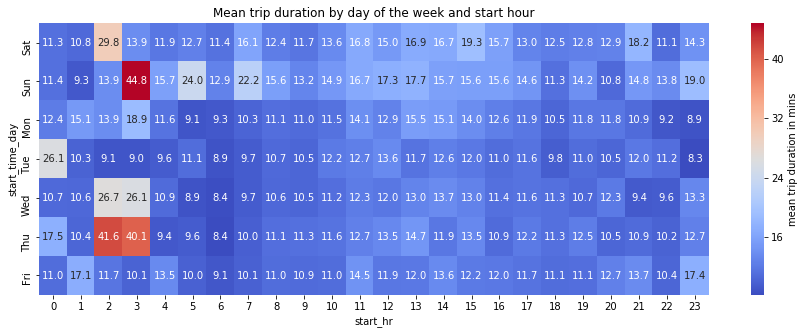

In [52]:
# Plotting the heatmap.
plt.figure(figsize=[15,5])
pivot= bike.pivot_table(values='duration_min',index='start_time_day',columns='start_hr')
ax=sb.heatmap(pivot,annot=True,fmt='.1f',cmap='coolwarm',cbar_kws={'label':'mean trip duration in mins'})
#ax.set_ylim(15,0);
plt.title('Mean trip duration by day of the week and start hour');

####  Mean trip duration in minutes is higher during early morning on weekends specially Sunday. Similar trend shows up for Thursday and Saturday.

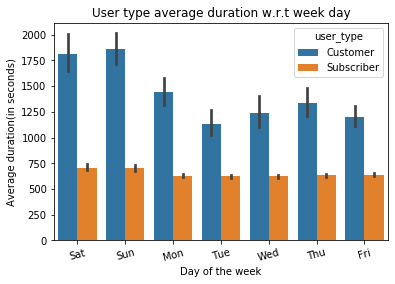

In [53]:
# Multivariate chart for customer category vs average duration and week day.
sb.barplot(data=bike,x='start_time_day',y='duration_sec',hue='user_type');
plt.xticks(rotation=15);
plt.xlabel('Day of the week');
plt.ylabel('Average duration(in seconds)');
plt.title('User type average duration w.r.t week day');

#### The plot above shows Average duration (secs) higher for customer category specially on weekend. Same is the case with Subscriber type.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Saturday and Sunday shows higher average duration for both customer types categories.
> The longer duration traffic shows during weekends.

### Were there any interesting or surprising interactions between features?

> Sunday early hours shows the longest trip duration.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!